# Scikit-learn

Uma das bibliotecas mais usadas para aprendizado de máquina, processamento de imagens e etc. Como citado anteriormente, precisamos dos dados bem condicionados pra construir os modelos.

Dados bem condicionados != modelo bem condicionado, porém:
Dados mal condicionados === modelo mal condicionado

## Preparando os dados

Primeiro, além de limpar os dados, precisamos separar os dados de treinamento dos dados de teste. O modelo nunca pode ver os dados de teste enquanto está sendo treinado, apenas quando for testado.

Na etapa de testes é possível medir a precisão do modelo

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

heart_disease = pd.read_csv('./data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Nesse dataframe "heart disease" queremos prever se um paciente terá ou não doença cardíaca de acordo com os dados de outros pacientes, Assim temos:

- Features (X): são os dados que nos ajudam a prever o target. Nesse caso, todos os dados podem ser considerados feature, exceto o target.
- Target(y): Variável que queremos prever

In [73]:
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

display(X.head(), y.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

display(X_train, X_test, y_train, y_test)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
114,55,1,1,130,262,0,1,155,0,0.0,2,0,2
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2
218,65,1,0,135,254,0,0,127,0,2.8,1,1,3
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3


246    0
197    0
261    0
163    1
297    0
      ..
21     1
6      1
168    0
235    0
295    0
Name: target, Length: 242, dtype: int64

114    1
224    0
23     1
298    0
69     1
      ..
28     1
218    0
179    0
259    0
254    0
Name: target, Length: 61, dtype: int64

# Regressão

Previsão de preços remete à previsão de números. Quando o modelo prevê números, é denominado uma **regressão**. Existem vários tipos de regressão, com características diferentes. Vamos começar com o Workflow básico


## Preparando os dados

Como de costume, começar lendo os dados:

In [75]:
car_sales = pd.read_csv('./data/car-sales-extended.csv')
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


## Tratando os dados

A fase inicial de preparar o dataset (limpar os dados) não precisa ser feita nesse exemplo pois não há a existência de valores nulos nem de faltantes, porém se houverem valores faltantes há duas formas principais de contornar o problema:

1. Imputação: Substituir valores de determinado grupo
2. Remover os dados faltantes

Imputação se feita de forma errada pode comprometer o desempenho do modelo e há muita pesquisa acerca disso, e remover dados faltantes pode representar uma quantidade muito grande de dados do dataset, então é melhor fazer com cuidado.

Lendo então outro dataset com valores faltantes:

In [76]:
car_sales_missing = pd.read_csv('./data/car-sales-extended-missing-data.csv')
car_sales_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


Como visto, há valores faltantes no dataset `car_sales_missing`. Podemos simplesmente remover as linhas com informação faltante, o que pode não ser uma boa ideia já que temos 50 valores faltantes em cada coluna, o que pode representar até 250 linhas a menos, então podemos optar por:

1. Preencher as marcas e cores com um valor fictício
2. Preencher o odômetro e o preço com a média
   1. No caso do preço podemos também remover, já que é o target
3. Preencher o número de portas com 4, já que a maioria dos carros têm 4 portas. Também poderíamos usar a média

In [77]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing['Price']

In [78]:
car_sales_missing['Make'].fillna('missing', inplace=True)
car_sales_missing['Colour'].fillna('missing', inplace=True)
car_sales_missing['Odometer (KM)'].fillna(
                                          car_sales_missing['Odometer (KM)'].mean(), 
                                          inplace=True)
car_sales_missing['Doors'].fillna(4, inplace=True)

# Para os preços vamos remover, pois é o target
car_sales_missing.dropna(inplace=True)

car_sales_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           950 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 44.5+ KB


Como visto, agora nosso dataframe está limpo e podemos passar para os próximos passos, porém também podemos usar o scikit-learn para limpar os valores nulos.

## Encoding

Ainda assim, há um fator à se considerar: Queremos fazer uma regressão numérica e há variáveis categóricas no dataset: 

- Make, Colour, Doors -> são categóricas
- Odometer (KM), Price -> são numéricas

Para transformar variáveis categóricas em numéricas podemos utilizar do processo de **Encoding**. Esse processo basicamente troca os valores de categóricos para numéricos transformando cada classe em uma coluna separada.

De forma simplista, uma coluna X, com classes A,B,C, se torna 3 colunas diferentes: X_A, X_B, X_C; e são atribuídos zeros ou uns para cada tupla com a classe correspondente. Vai ficar mais visível posteriormente.

Vamos começar separando features e target:

In [79]:
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']

display(X,y)

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


0      15323
1      19943
2      28343
3      13434
4      14043
       ...  
995    32042
996     5716
997    31570
998     4001
999    12732
Name: Price, Length: 1000, dtype: int64

Sabendo que há variáveis categóricas **não transformadas em numéricas**, vamos tentar usar algum modelo mesmo assim para confirmar a necessidade de conversão:

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [81]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# model.fit(X_train, y_train)

Como o esperado, o modelo não consegue dar um fit, porque há variáveis categóricas nele:

> `ValueError: could not convert string to float: 'Honda'`

Transformando então os valores categóricos em numéricos, usando o HotEncoder:

In [82]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
encoder = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', 
                                    encoder,
                                    categorical_features)],
                                    remainder='passthrough')

transf_X = transformer.fit_transform(X)
display(pd.DataFrame(transf_X))


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


Usando o `OneHotEncoder` e  o `ColumnTransformer` conseguimos transformar todos os dados categóricos em numéricos. Há como fazer a mesma coisa com `Pandas` diretamente - e de forma mais legível - com o uso de `get_dummies()`:

In [83]:
# é necessário converter 'Doors' para um tipo não-numérico para que a função funcione.
car_sales['Doors'] = car_sales['Doors'].astype(object) 
dummies = pd.get_dummies(car_sales[categorical_features])
display(dummies)

,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Doors_3,Doors_4,Doors_5
0,0,1,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,1,0
3,0,0,0,1,0,0,0,0,1,0,1,0
4,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,1,0,0,0,0,0,1,0
996,0,0,1,0,0,0,0,0,1,1,0,0
997,0,0,1,0,0,1,0,0,0,0,1,0
998,0,1,0,0,0,0,0,0,1,0,1,0


## Escolhendo um modelo e testando

Agora com os valores transformados podemos usar o modelo e avaliar a performance:

In [84]:
X_train, X_test, y_train, y_test = train_test_split(transf_X,y, test_size=0.2)

np.random.seed(42) # Apenas para usar a mesma seed da aula
model = RandomForestRegressor(n_estimators=10)
model.fit(X_train, y_train)

model.score(X_test,y_test)

0.23912861538993768

É possível verificar que a precisão do modelo está muito baixa, mas por hora não é o foco ajustar esse modelo. Há vários fatores para a precisão do modelo ser baixa, e a escolha do modelo pode ser um dos fatores. Avaliando a documentação do scikit-learn:

![](https://scikit-learn.org/stable/_static/ml_map.png)

É possível verificar que seguindo o fluxograma, o modelo RandomForest deveria performar bem nesse caso, mas podemos também experimentar outros modelos, como Lasso ou ElasticNet.

Vamos usar agora outro dataset para testar dois modelos diferentes:

In [85]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

display(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [86]:
housing_df = pd.DataFrame(data=housing['data'], columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [87]:
housing_df['target'] = housing['target'] 
housing_df.info()
housing_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Comparando modelos
 
Com os dados lidos, vamos testar o modelo de Ridge, e comparar com o RandomForest

In [88]:
from sklearn.linear_model import Ridge

np.random.seed(42)

model = Ridge()

X = housing_df.drop('target', axis=1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5758549611440126

A pontuação do modelo $(R^2)$ é de aproximadamente 57%, o que não é tão ruim quanto os 18% no exemplo dos carros, mas ainda é baixo. Vamos tentar então o random forest>

In [89]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

model = RandomForestRegressor()

# Não é necessário fazer split dos dados de novo

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8051230593157366

A pontuação $(R^2)$ do modelo RandomForestRegressor é de aproximadamente 80%, que já é um bom valor se comparado com o Ridge

# Classificação

A classificação segue as mesmas premissas de tratar os dados, mas com algumas diferenças, como por exemplo o encoding. Nesse ponto ainda não consigo afirmar se classificação necessita de encoding mas com certeza não necessita de transformar dados categóricos em numéricos. 

Retomando o dataset de doenças do coração:

In [90]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Como nesse dataset temos dados com label podemos usar algoritmos de classificação. Seguindo o mapa do scikit-learn podemos usar o método Linear SVC.

In [91]:
from sklearn.svm import LinearSVC

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/home/pesadaum/development/learning/courses/data-science-and-machine-learning-ztm/env/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

O classificador LinearSVC teve a precisão de cerca de 86%, porém há um erro de convergência do modelo, que pode implicar em pouca capacidade de trabalhar em outros datasets. Então, passando agora para um modelo da biblioteca ensemble, o RandomForestClassifier:

In [92]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

A precisão do modelo é de cerca de 85%, um pouco pior que o LinearSVC mas é razoavelmente mais confiável, pelo fato de ter alcançado a convergência.

# Fazendo previsões com o modelo

Há duas formas de prever dados com o modelo treinado:

1. Usar a função de prever - `predict()`
2. 1. Usar a função de prever probabilidade - `predict_proba()`

As duas formas são uteis. A segunda em especial permite avaliar o quão o modelo está confiável em prever os dados:

In [93]:
y_preds = clf.predict(X_test)
real_values = np.array(y_test)

display(y_preds, real_values, y_preds == real_values)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [94]:
probas = clf.predict_proba(X_test)
display(np.array(probas)[5])

array([0.14, 0.86])

In [95]:
from sklearn.metrics import accuracy_score

acc1 = accuracy_score(y_test, y_preds) # primeiro jeito
acc2 = np.mean(y_preds == y_test) # segundo jeito
acc3 = clf.score(X_test, y_test) # terceiro jeito

display(acc1, acc2, acc3) # 

0.8524590163934426

0.8524590163934426

0.8524590163934426

Obviamente o modelo de regressão também pode prever as probabilidades e os valores. Retomando o DatFrame das casas, vamos prever os valores:

In [96]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [97]:
X = housing_df.drop('target', axis=1)
y = housing['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8094425973856642

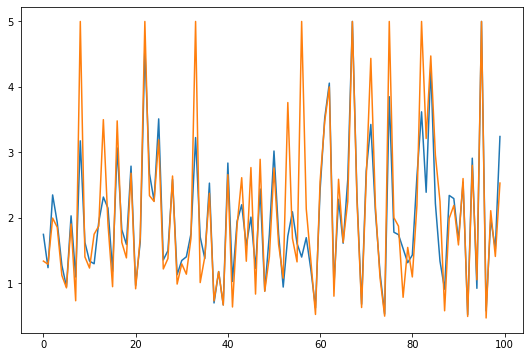

In [98]:
y_preds = model.predict(X_test[:100])
real_values = np.array(y_test[:100])

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(y_preds, label='Modelo')
ax.plot(real_values)

# display(y_preds, real_values, y_preds == real_values)

In [99]:
from sklearn.metrics import mean_absolute_error

rms = mean_absolute_error(real_values, y_preds)
rms

0.3426713170000003

# Avaliando a precisão do modelo

## Validação cruzada

Além do método padrão de cada modelo de obter o score $R^2$, podemos usar a validação cruzada. Essa validação extrai o $R^2$ do modelo para uma janela de tamanho $k$ qualquer. É uma alternativa melhor de avaliar a precisão do modelo pois se por alguma coincidência o modelo for muito bem em um pedaço dos dados pode ser pura sorte, e ir muito mal em outro pedaço. A validação cruzada nos mostra isso.

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [101]:
cv_score = cross_val_score(clf, X, y, cv=5)
mean_cv_score = np.mean(cv_score)
score = clf.score(X_test, y_test)

display(cv_score, mean_cv_score, score)

array([0.83606557, 0.90163934, 0.80327869, 0.78333333, 0.8       ])

0.8248633879781421

0.9180327868852459

## AUC/ROC

É a famosa curva que mostra a área abaixo da curva da curva característica do operador de recepção (area under the curve (AUC) of Receiver operating characteristic (ROC))

Mostra de forma visual a taxa de valores falsos e verdadeiros. 

In [102]:
from sklearn.metrics import roc_curve

y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.94, 0.06],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.3 , 0.7 ],
       [0.86, 0.14],
       [0.05, 0.95],
       [0.25, 0.75],
       [0.85, 0.15],
       [0.02, 0.98],
       [0.45, 0.55]])

In [103]:
y_probs_pos = y_probs[:,1]
fpr, tpr, thresh = roc_curve(y_test, y_probs_pos)

In [104]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0,1],[0,1], '--', label='Advinhando')
    plt.xlabel('Taxa de positivos falsos')
    plt.ylabel('Taxa de positivos verdadeiros')
    plt.title('ROC/AUC do modelo')
    plt.legend(loc='best')
    plt.show()

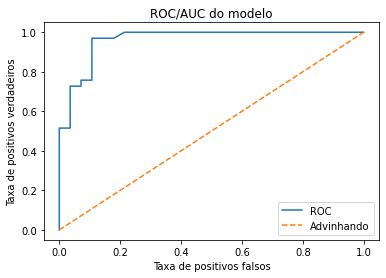

In [105]:
plot_roc_curve(fpr,tpr)

In [106]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_pos)

0.9615800865800866

## Matriz de confusão

Esse é um tema confuso. Não podia deixar esse trocadilho passar. Mas é a forma de avaliar o quanto o modelo está confuso com alguns dados.

<AxesSubplot:>

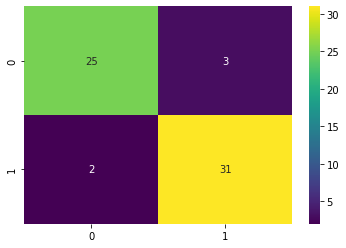

In [107]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_preds = clf.predict(X_test)

conf_tab= pd.crosstab(y_test,
                          y_preds,
                          rownames=['Valores reais'],
                          colnames=['Valores previstos'])

conf_matrix = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_matrix, annot=True, cmap='viridis')

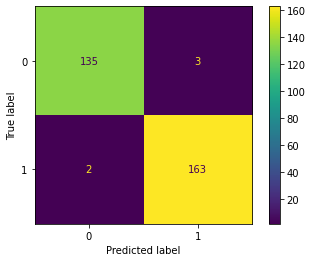

In [108]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

## Relatório de classificação

Mostra outras métricas de precisão, acurácia, taxa de recall, f1-score, entre outros

Nota: nem sempre um modelo pode ser avaliado apenas pela precisão. Pegando um exemplo de um DataFrame com 999 entradas positivas, apenas 1 entrada negativa, nosso modelo muito possivelmente vai prever que 1000 entradas serão positivas. Isso resulta em uma precisão de 99%, um recall de 100%, e numa média macro (macro avg) de 50%. Assim, o modelo pode não ser muito útil considerando esse cenário.

In [110]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.91      0.94      0.93        33

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

